# Making a map that looks pretty much like NCL

NCL likes to default to the cylindrical equidistant projection. Using Cartopy, that's pretty much (_exactly?_) equivalent to PlateCarree.

One place where Cartopy really needs some help is with labeling the lat/lon coordinates. With PlateCarree, however, it is pretty easy. You can also just add a grid using matplotlib's grid method, but as shown below it will be drawn at the tick labels. 

You shouldn't use rainbow colormaps, but since most NCL plots do, I used one in the first example. 

In the second example, I repeat the first, but add contour lines with labels. I took off the grid because it was too much.

The third example is a better plot, but it doesn't have lat/lon labels, which could be a deficiency in some circumstances.

In [49]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [2]:
ds = xr.open_dataset("/glade/work/brianpm/b.e21.BHIST.f09_g17.CMIP6-historical.010/b.e21.BHIST.f09_g17.CMIP6-historical.010.cam.h0.FLUT.200001-201412.nc")

In [6]:
x = ds['FLUT']
xavg = x.mean(dim='time')
lat = ds['lat']
lon = ds['lon']

In [32]:
coslat = np.cos(np.radians(lat))
x_global_average = (xavg.mean(dim='lon') * coslat).sum() / coslat.sum()
print(x_global_average.values)

239.89651115908825


In [12]:
wrap_data, wrap_lon = add_cyclic_point(xavg, coord=lon)
lons, lats = np.meshgrid(wrap_lon, lat)

Text(1.0, 1.0, 'AVG:  239.9')

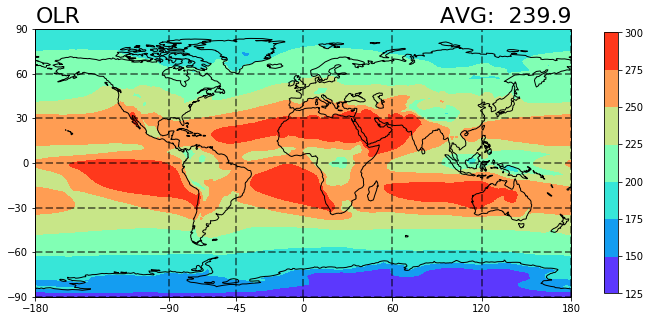

In [40]:
fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection':ccrs.PlateCarree()})
img = ax.contourf(lons, lats, wrap_data, transform=ccrs.PlateCarree(), cmap='rainbow')
ax.coastlines()
ax.set_xticks([-180,-90, -45, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.grid(linewidth=2, color='black', alpha=0.5, linestyle='--')
cb = fig.colorbar(img, ax=ax, shrink=0.8)
ax.set_title(f"OLR", loc='left', fontsize=22)
ax.set_title(f"AVG: {x_global_average.values: 4.1f}", loc='right', fontsize=22)

<a list of 20 text.Text objects>

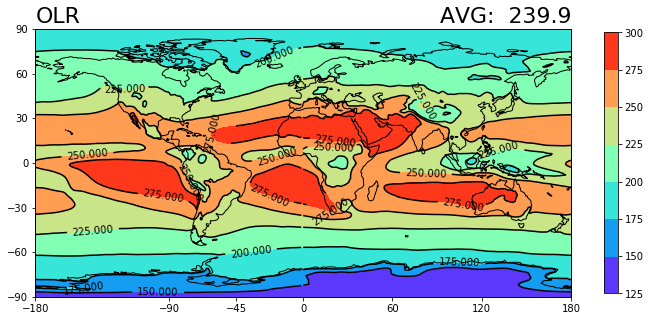

In [45]:
fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection':ccrs.PlateCarree()})
img = ax.contourf(lons, lats, wrap_data, transform=ccrs.PlateCarree(), cmap='rainbow')
ax.coastlines()
ax.set_xticks([-180,-90, -45, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# ax.grid(linewidth=2, color='black', alpha=0.5, linestyle='--')
cb = fig.colorbar(img, ax=ax, shrink=0.8)
ax.set_title(f"OLR", loc='left', fontsize=22)
ax.set_title(f"AVG: {x_global_average.values: 4.1f}", loc='right', fontsize=22)

# add contour
# Note: using wrapped data makes spurious lines across plot (maybe coordinate dependent)
lon2, lat2 = np.meshgrid(lon, lat)
CS = ax.contour(lon2, lat2, xavg, transform=ccrs.PlateCarree(), colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

<a list of 20 text.Text objects>

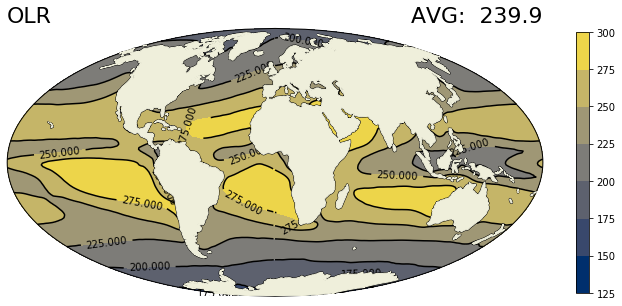

In [93]:
fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection':ccrs.Mollweide()})
img = ax.contourf(lons, lats, wrap_data, transform=ccrs.PlateCarree(), cmap='cividis')

cb = fig.colorbar(img, ax=ax, shrink=0.8)
ax.set_title(f"OLR", loc='left', fontsize=22)
ax.set_title(f"AVG: {x_global_average.values: 4.1f}", loc='right', fontsize=22)

ax.coastlines(linewidth=2, color='black', edgecolor='black', zorder=99)
ax.add_feature(cartopy.feature.LAND, zorder=100)


# add contour
# Note: using wrapped data makes spurious lines across plot (maybe coordinate dependent)
lon2, lat2 = np.meshgrid(lon, lat)
CS = ax.contour(lon2, lat2, xavg, transform=ccrs.PlateCarree(), colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)



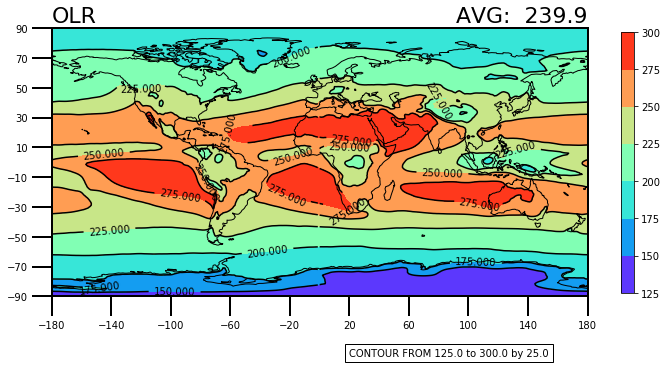

In [91]:

# Make Ticks ridiculously large, thicken the frame, put contour label annotation

fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'projection':ccrs.PlateCarree()})
img = ax.contourf(lons, lats, wrap_data, transform=ccrs.PlateCarree(), cmap='rainbow')
ax.outline_patch.set_linewidth(2)
ax.coastlines()
ax.set_xticks(np.linspace(-180, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 10), crs=ccrs.PlateCarree())
# ax.grid(linewidth=2, color='black', alpha=0.5, linestyle='--')
cb = fig.colorbar(img, ax=ax, shrink=0.8)
ax.set_title(f"OLR", loc='left', fontsize=22)
ax.set_title(f"AVG: {x_global_average.values: 4.1f}", loc='right', fontsize=22)
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
# add contour
# Note: using wrapped data makes spurious lines across plot (maybe coordinate dependent)
lon2, lat2 = np.meshgrid(lon, lat)
CS = ax.contour(lon2, lat2, xavg, transform=ccrs.PlateCarree(), colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.text( 20, -130, f"CONTOUR FROM {min(CS.levels)} to {max(CS.levels)} by {CS.levels[1]-CS.levels[0]}", bbox=dict(facecolor='none', edgecolor='black'))
'';